In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv').as_matrix()
test_data = pd.read_csv('test.csv').as_matrix()
x_train = train_data[0:,1:]
y_train = train_data[0:,0]
x_test = test_data

In [3]:
m = x_train.shape[0]
n = x_train.shape[1]
labels = np.unique(y_train)
labels_count = labels.shape[0]

In [4]:
# plot single image
def plot_image(array, size=28):
    plt.imshow(array.reshape(size, size))
    plt.show()

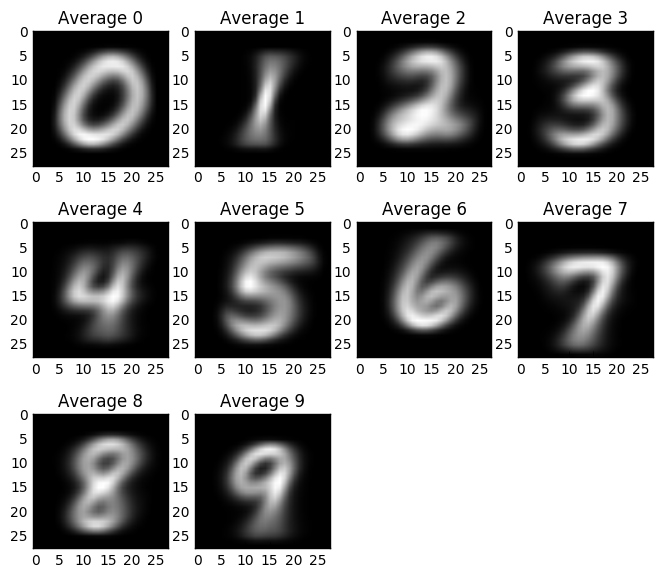

In [34]:
# Creating and plotting average digits
average_digits = np.empty((0, n+1))

plt.figure(figsize=(8,7))
plt.gray()

for label in labels:
    digits = x_train[y_train.flatten() == label]
    average_digit = digits.mean(0)
    average_digits = np.vstack((average_digits, np.append(average_digit, label)))
    image = average_digit.reshape(28, 28)
    plt.subplot(3,4,label+1)
    plt.imshow(image)
    plt.title('Average '+str(label))
plt.show()

average_digits_x = average_digits[:,:-1]
average_digits_y = average_digits[:,-1]

In [35]:
# predicting the label by proximity to the avearge

# for the training set
predictions = np.empty(0)
for digit in x_train:
    d = ((average_digits_x - digit)**2).sum(axis=1)
    index = np.argmin(d)
    prediction = average_digits_y[index]
    predictions = np.append(predictions, prediction)
predictions = predictions.astype('int')
#accuracy on the training set
accuracy = np.sum(predictions == y_train) / m
print("Accuracy on the training set is: {:f}".format(accuracy))

Accuracy on the training set is: 0.809500


In [36]:
# predicting the label by proximity to the avearge

# for the test set
predictions = np.empty(0)
for digit in x_test:
    d = ((average_digits_x - digit)**2).sum(axis=1)
    index = np.argmin(d)
    prediction = average_digits_y[index]
    predictions = np.append(predictions, prediction)
predictions = predictions.astype('int')

# writing predictions to .csv
df = pd.DataFrame(columns=['ImageId','Label'])
df['ImageId'] = np.arange(1,28001)
df['Label'] = predictions
df.to_csv('test_predictions.csv', index=False)

In [37]:
a=np.empty(0)
a=np.array([[1,23,4,5],[21,2,3,4,5]])

In [38]:
a

array([[1, 23, 4, 5], [21, 2, 3, 4, 5]], dtype=object)

In [29]:
a[0][2]

4

In [30]:
a.mean(0)

TypeError: unsupported operand type(s) for /: 'list' and 'int'